# Python: Introduction to Data Analysis with Pandas
  

Welcome to this tutorial about doing data analysis with `pandas`. If you did the Introductory Python tutorial, you'll rememember we briefly looked at the `pandas` package as a way of quickly loading a .csv file to extract some data. This tutorial looks at pandas in some more depth. 

## What is pandas?

Pandas is a package commonly used to deal with data analysis. It simplifies the loading of data from external sources such as text files and databases, as well as providing ways of analysing and manipulating data once it is loaded into your computer. The features provided in pandas automate and simplify a lot of the commonly used tasks that would take many lines of code to write in the basic Python langauge.

_If you have used R's dataframes before, or the NumPy package in Python, you may find some similarities in the Python `pandas` package. But if not, don't worry because this tutorial doesn't assume any knowledge of NumPy or R, only basic-level Python._

Pandas is a hugely popular, and still growing, Python library used across a range of disciplines from environmental and climate science, through to social science, linguistics, biology, as well as a number of applications in industry such as data analytics, financial trading and many others. If you came to the last tutorial, you'll know I'm a fan of these StackOverflow graphs showing usage of programming languages over time. Well, I found another one showing the growth of Pandas compared to some other Python software libraries:

(image here)

Pandas is best suited for structured, __labled__ data, in other words, tabular data, that has headings or names associated with each column of data. The pandas.org website describes its data-handling strengths as:

 - Tabular data with heterogeneously-typed columns, as in an SQL table or Excel spreadsheet
 - Ordered and unordered (not necessarily fixed-frequency) time series data.
 - Arbitrary matrix data (homogeneously typed or heterogeneous) with row and column labels
 - Any other form of observational / statistical data sets. The data actually need not be labeled at all to be placed into a pandas data structure
 
Some other important points to note about pandas are:

 - pandas is __fast__. Python sometimes gets a bad rap for being a bit slow compared to 'compiled' languages such as C and Fortran. But deep down in the internals of Pandas, it is actually written in C, and so processing large datasets is no problem for pandas.
 - pandas is a dependency of another library called `statsmodels`, making it an important part of the statistical computing ecosystem in Python.
 
## What will be covered in this tutorial

 - Aims. 
 

## Conventions for using pandas
All the examples in this tutorial assume you have installed the Python library pandas, either through using a scientific python distribution such as Anaconda/Spyder, or by installing it using a package-manager. If you are writing scripts, it's assumed that you have the import statement at the top of your script like so:

In [1]:
import pandas as pd

Every time we use a pandas feature thereafter, we can shorten what we type by just typing `pd`, such as `pd.some_function()`. Try the following to see which version of pandas you are running:

In [2]:
pd.__version__

'0.22.0'

## Pandas data structures
Pandas has two core datastructures used to store data: The _Series_ and the _Dataframe_. 

### Series

The series is a one-dimensional array-like structure designed to hold a single array (or 'column') of data and an associated array called of data labels, called an _index_. We can create a series to experiment with just by passing a list of data, let's use numbers in this example:

In [3]:
my_series = pd.Series([4.6, 2.1, -4.0, 3.0])
my_series

0    4.6
1    2.1
2   -4.0
3    3.0
dtype: float64

Note that printing out our _Series_ object prints out the values and the index numbers. If we just wanted the values, we can do this with:


In [4]:
my_series.values

array([ 4.6,  2.1, -4. ,  3. ])

For a lot of applications, a plain old Series is probably not a lot of use, but it is the core component of the pandas workhorse, the _DataFrame_, so it's useful to know about.

### DataFrames
The DataFrame represents tabular data, a bit like a spreadsheet. DataFrames are organised into colums (each of which is a _Series_), and each column can store a single data-type, such as floating point numbers, strings, boolean values etc. DataFrames can be indexed by either their row or column names. (They are similar in many ways to R's `data.frame`.)

We can create a dataframe in pandas from a python dictionary, or by loading in a text file containing tabular data.

#### A note on dictionaries

_You can skip this section if you already know about the built-in Python data structure called a `dictionary`_

Dictionaries are a Python data structure that contain a set of key:value pairs. If you think of a written language dictionary, say for English-Hungarian, and you wanted to know the Hungarian word for "spaceship", you would look-up the English word (the `key`) and the dictionary would give you the Hungarian translation (the `value`). So the "key-value pair" would be `'spaceship': 'űrhajó'`. 

To construct this in Python, we would write:


In [5]:
hungarian_dictionary = {'spaceship': 'űrhajó'}

We could then look-up items in our dictionary with this syntax:

In [6]:
hungarian_dictionary['spaceship']

'űrhajó'

Dictionaries can have multiple entries (multiple key-value pairs), and these are separated with a comma:

In [7]:
hungarian_dictionary = {'spaceship': 'űrhajó',
                        'watermelon': 'görögdinnye',
                        'bicycle': 'kerékpár'}

The `values` in dictionaries are not limtied to single strings or words. Values can be any Python object such as numbers, lists, tuples, or even other dictionaries:


In [8]:
# Names (keys) mapped to a tuple (the value) containing the height, lat and longitude.
scottish_hills = {'Ben Nevis': (1345, 56.79685, -5.003508),
                  'Ben Macdui': (1309, 57.070453, -3.668262),
                  'Braeriach': (1296, 57.078628, -3.728024),
                  'Cairn Toul': (1291, 57.054611, -3.71042),
                  'Sgòr an Lochain Uaine': (1258, 57.057999, -3.725416)}

Looking up a Scottish mountain using its name as the `key` would then give us the height, latitude and longitude as the `value` returned.

In [9]:
scottish_hills['Braeriach']

(1296, 57.078628, -3.728024)

### Back to DataFrames...
If we didn't have any real data to play with from an external file, we could manually create a DataFrame from a Python dictionary.

In [10]:
hills = pd.DataFrame(scottish_hills)
print(hills)

    Ben Macdui    Ben Nevis    Braeriach   Cairn Toul  Sgòr an Lochain Uaine
0  1309.000000  1345.000000  1296.000000  1291.000000            1258.000000
1    57.070453    56.796850    57.078628    57.054611              57.057999
2    -3.668262    -5.003508    -3.728024    -3.710420              -3.725416


Now, this is not necessarily the most logical order to store data. It would probably make more sense for the columns to be categories or types of data, rather than names. To do this, we need to think about how to structure our dictionary. Pandas works best with dictionaries when the dictionary keys refer to column names or headers. Here's a better dictionary to use:

In [11]:
scottish_peaks = {'Hill Name': ['Ben Nevis', 'Ben Macdui', 'Braeriach', 'Cairn Toul', 'Sgòr an Lochain Uaine'],
                  'Height': [1345, 1309, 1296, 1291, 1258],
                  'Latitude': [56.79685, 57.070453, 57.078628, 57.054611, 57.057999],
                  'Longitude': [-5.003508, -3.668262, -3.728024, -3.71042, -3.725416]}

dataframe = pd.DataFrame(scottish_peaks)
print(dataframe)

   Height              Hill Name   Latitude  Longitude
0    1345              Ben Nevis  56.796850  -5.003508
1    1309             Ben Macdui  57.070453  -3.668262
2    1296              Braeriach  57.078628  -3.728024
3    1291             Cairn Toul  57.054611  -3.710420
4    1258  Sgòr an Lochain Uaine  57.057999  -3.725416


The columns are ordered alphabetically by default, but we can specify the order using the `columns` keyword. (Another way would be to use an `OrderedDict` data structure, but that's not covered in this tutorial...)

In [12]:
dataframe = pd.DataFrame(scottish_peaks, columns=['Hill Name', 'Height', 'Latitude', 'Longitude'])
print(dataframe)

               Hill Name  Height   Latitude  Longitude
0              Ben Nevis    1345  56.796850  -5.003508
1             Ben Macdui    1309  57.070453  -3.668262
2              Braeriach    1296  57.078628  -3.728024
3             Cairn Toul    1291  57.054611  -3.710420
4  Sgòr an Lochain Uaine    1258  57.057999  -3.725416


Note how the dictionary keys have become column headers running along the top, and as with the Series, an index number has been automatically generated.

Pandas dataframes have many useful methods that can be used to inspect the data and manipulate it. We are going to have a look at just a few of them.

If our DataFrame was huge, we would not want to print all of it to screen, instead we could have a look at the first few items with the `head` method, which takes the number of rows you want to view as its argument:

In [13]:
print(dataframe.head(3))

    Hill Name  Height   Latitude  Longitude
0   Ben Nevis    1345  56.796850  -5.003508
1  Ben Macdui    1309  57.070453  -3.668262
2   Braeriach    1296  57.078628  -3.728024


We could also look at the last couple of values with the `tail` method:

In [14]:
print(dataframe.tail(2))

               Hill Name  Height   Latitude  Longitude
3             Cairn Toul    1291  57.054611  -3.710420
4  Sgòr an Lochain Uaine    1258  57.057999  -3.725416


### Accessing data

Our columns are individual Series of data. We can access them by referring to the column name.

In [15]:
print(dataframe['Hill Name'])

0                Ben Nevis
1               Ben Macdui
2                Braeriach
3               Cairn Toul
4    Sgòr an Lochain Uaine
Name: Hill Name, dtype: object


In [16]:
dataframe['Height']

0    1345
1    1309
2    1296
3    1291
4    1258
Name: Height, dtype: int64

Note that pandas DataFrames are accessed primarily by columns, in a sense the row is less important to a DataFrame. For example, try the following code:


In [17]:
#dataframe[0]

Ouch! That's a lot of error message... __The columns cannot be accessed by their index number in this way__, you must use the column name. You may have thought that this might return the row index instead, but we have to use a different method to get the row:

In [18]:
dataframe.iloc[0]

Hill Name    Ben Nevis
Height            1345
Latitude       56.7968
Longitude     -5.00351
Name: 0, dtype: object

The `iloc` method gives us access to the DataFrame in more traditional 'matrix' style notation, i.e. `[row, column]` notation. So if we wanted to get the height of Ben Nevis specifically, we could do:

In [19]:
dataframe.iloc[0,0]

'Ben Nevis'

A way to remeber this is that `iloc` is short for "**i**nteger **loc**ation". But a more pandas-style approach would be to do:

In [20]:
dataframe['Hill Name'][0]

'Ben Nevis'

In other words, we are saying to our pandas DataFrame _get me the `Height` Series, and give me the zero-th item in that Series._ Remember Python uses zero-indexing (starts counting items from zero).

An even quicker way to access our columns (less typing) is to treat the names as if they were attributes of our DataFrame, like this:

In [21]:
dataframe.Height

0    1345
1    1309
2    1296
3    1291
4    1258
Name: Height, dtype: int64

### Filtering data

We can also apply conditions to the data we are inspecting, such as to filter our data.

In [22]:
dataframe.Height > 1300

0     True
1     True
2    False
3    False
4    False
Name: Height, dtype: bool

This returns a new Series of True/False values though. To actually filter the data, we need to use this Series to mask our original DataFrame:

In [23]:
dataframe[dataframe.Height > 1300]

,Hill Name,Height,Latitude,Longitude
0,Ben Nevis,1345,56.796850,-5.003508
1,Ben Macdui,1309,57.070453,-3.668262


### Appending data

We can also append data to the DataFrame. This is done using the following syntax:

In [24]:
dataframe['Region'] = ['Grampian', 'Cairngorm', 'Cairngorm', 'Cairngorm', 'Cairngorm']
print(dataframe)

               Hill Name  Height   Latitude  Longitude     Region
0              Ben Nevis    1345  56.796850  -5.003508   Grampian
1             Ben Macdui    1309  57.070453  -3.668262  Cairngorm
2              Braeriach    1296  57.078628  -3.728024  Cairngorm
3             Cairn Toul    1291  57.054611  -3.710420  Cairngorm
4  Sgòr an Lochain Uaine    1258  57.057999  -3.725416  Cairngorm


### Reading data from a file

Pandas has built in tools for reading data from a variety of data formats, including Excel spreadsheets, raw text and csv files. It can also interface with databases such as MySQL, but we are not going to cover databases in this tutorial.

We've provided the `scottish_peaks.csv` file, which contains **all** the mountains above 3000 feet (about 914 metres) in Scotland. We can load this easily into a DataFrame with:

In [25]:
dataframe = pd.read_csv("data/scottish_peaks.csv")

In [26]:
print(dataframe.head(10))

                    Hill Name  Height   Latitude  Longitude    Osgrid
0       A' Bhuidheanach Bheag   936.0  56.870342  -4.199001  NN660775
1               A' Chailleach   997.0  57.693800  -5.128715  NH136714
2               A' Chailleach   929.2  57.109564  -4.179285  NH681041
3  A' Chraileag (A' Chralaig)  1120.0  57.184186  -5.154837  NH094147
4             A' Ghlas-bheinn   918.0  57.255090  -5.303687  NH008231
5               A' Mhaighdean   967.0  57.719644  -5.346720  NH007749
6              A' Mharconaich   973.2  56.857002  -4.290668  NN604762
7                  Am Basteir   934.0  57.247931  -6.202982  NG465253
8                   Am Bodach  1031.8  56.741727  -4.983393  NN176650
9               Am Faochagach   953.0  57.771801  -4.853899  NH303793


It looks like this table contains the hills in alphabetical order. We can sort the DataFrame using the `sort_values` method:

In [27]:
sorted_hills = dataframe.sort_values(by=['Height'], ascending=False)

# Let's have a look at the top 5 to check
print(sorted_hills.head(5))

                       Hill Name  Height   Latitude  Longitude    Osgrid
92                     Ben Nevis  1344.5  56.796891  -5.003675  NN166712
88   Ben Macdui (Beinn Macduibh)  1309.0  57.070368  -3.669099  NN988989
104                    Braeriach  1296.0  57.078298  -3.728389  NN953999
115                   Cairn Toul  1291.0  57.054397  -3.710773  NN963972
212        Sgor an Lochain Uaine  1258.0  57.058369  -3.725797  NN954976


In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

x = dataframe.Height
y = dataframe.Latitude

plt.scatter(x, y)
plt.savefig("python-scatter.png")

In [29]:
from scipy.stats import linregress

stats = linregress(dataframe['Height'], dataframe['Latitude'])

m = stats.slope
b = stats.intercept

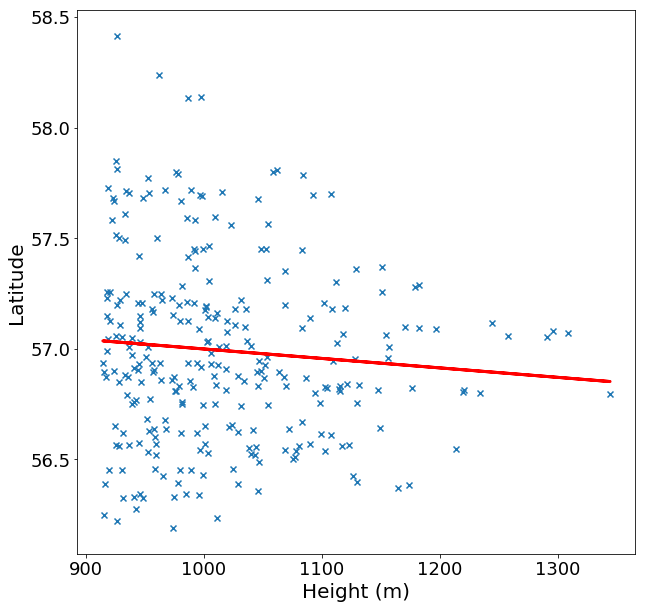

In [30]:
#m, b = pd.np.polyfit(dataframe['Height'], dataframe['Latitude'], 1)
#plt.plot(dataframe['Height'], m * dataframe['Height'] + b)
plt.figure(figsize=(10,10))

# Change the default marker from circles to x's
plt.scatter(x, y, marker='x')

# Set the linewidth to 3px
plt.plot(x, m * x + b, color="red", linewidth=3)

# Add x and y lables, and set their font size
plt.xlabel("Height (m)", fontsize=20)
plt.ylabel("Latitude", fontsize=20)

# Set the font size of the number lables on the axes
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig("python-linear-reg-custom.png")


## Bonus: Plotting data onto maps with Cartopy

Note: You need to have the cartopy module installed for this next part of the tutorial to work. The easiest way to do this on your own computer is with the package manager conda:

`conda install -c conda-forge cartopy`

This is only a short example, so don't worry if you can't install it right now, just try to follow the code and have  look at the final figure.

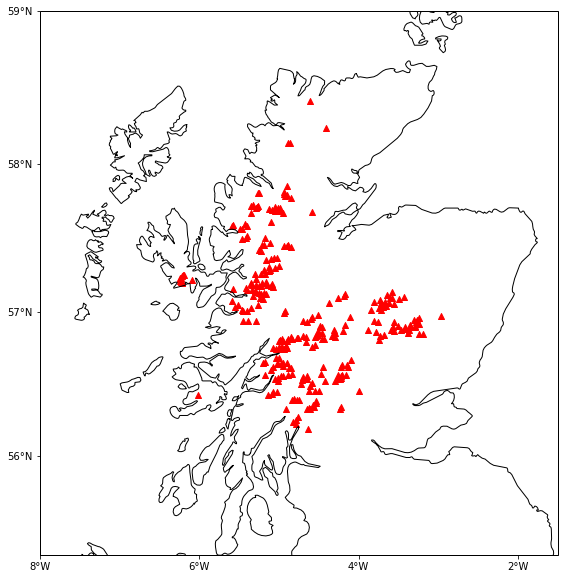

In [31]:
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.feature as cfeature

plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.Mercator())
ax.coastlines('10m')

ax.xaxis.set_visible(True)
ax.yaxis.set_visible(True)

ax.set_yticks([56,57,58,59], crs=ccrs.PlateCarree())
ax.set_xticks([-8, -6, -4, -2], crs=ccrs.PlateCarree())

lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

ax.set_extent([-8, -1.5, 55.3, 59])

plt.scatter(dataframe['Longitude'],dataframe['Latitude'],
                    color='red', marker='^', transform=ccrs.PlateCarree())
plt.savefig("munros.png")